In [32]:
 # Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import tensorflow as tf

In [34]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path("data/Holiday_Songs_Spotify.csv") 
)

# Review the DataFrame
df.head()

,Unnamed: 0,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,duration_ms,time_signature,key_mode,playlist_name,playlist_img,track_name,artist_name,album_name,album_img
0,1,00IqwkT0PZhJ86PJajRCqk,0.195,0.348,A#,-10.106,major,0.0332,0.820000,0.000000,...,166.824,213107,3,A# major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Silver Bells,Johnny Mathis,Merry Christmas,https://i.scdn.co/image/b878b9e27201163be07e74...
1,2,01h424WG38dgY34vkI3Yd0,0.225,0.248,A,-15.871,major,0.0337,0.912000,0.000143,...,96.013,183613,4,A major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,White Christmas,Bing Crosby,White Christmas,https://i.scdn.co/image/3bb0daf5f87a737ce67ace...
2,3,08BhfyKUXxZrnyHrDavNHP,0.444,0.288,F#,-11.793,major,0.0326,0.911000,0.000007,...,108.043,199093,3,F# major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,The Christmas Waltz,Tony Bennett,A Swingin' Christmas Featuring The Count Basie...,https://i.scdn.co/image/96aa4fb09e7fe9d38599c8...
3,4,095XSaT8I2uI6Uldj2QrSl,0.687,0.496,A,-4.708,major,0.0339,0.434000,0.001440,...,97.575,178680,4,A major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Stop the Cavalry,Jona Lewie,On The Other Hand There's A Fist (Remastered),https://i.scdn.co/image/50c0ea35cacbf7c5d495c7...
4,5,09b2gJR45Pyip2rx9CnXW1,0.477,0.841,F#,-5.172,major,0.0358,0.000165,0.097100,...,119.954,203404,4,F# major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,I Don't Want to Go Home for Christmas,Independent Counsel of Funk,I Don't Want to Go Home for Christmas,https://i.scdn.co/image/77eb7c17cafe55037a1ab2...


In [ ]:
# 2. Separate the features X from the target y

In [3]:
 # Seperate the features, X,  from the target variable, y
y = df['track_name']
X = df.drop(columns='track_name')

In [4]:
 # Preview the features data
X.head()

,Unnamed: 0,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,duration_ms,time_signature,key_mode,playlist_name,playlist_img,artist_name,album_name,album_img
0,1,00IqwkT0PZhJ86PJajRCqk,0.195,0.348,A#,-10.106,major,0.0332,0.820000,0.000000,...,0.262,166.824,213107,3,A# major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Johnny Mathis,Merry Christmas,https://i.scdn.co/image/b878b9e27201163be07e74...
1,2,01h424WG38dgY34vkI3Yd0,0.225,0.248,A,-15.871,major,0.0337,0.912000,0.000143,...,0.190,96.013,183613,4,A major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Bing Crosby,White Christmas,https://i.scdn.co/image/3bb0daf5f87a737ce67ace...
2,3,08BhfyKUXxZrnyHrDavNHP,0.444,0.288,F#,-11.793,major,0.0326,0.911000,0.000007,...,0.356,108.043,199093,3,F# major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Tony Bennett,A Swingin' Christmas Featuring The Count Basie...,https://i.scdn.co/image/96aa4fb09e7fe9d38599c8...
3,4,095XSaT8I2uI6Uldj2QrSl,0.687,0.496,A,-4.708,major,0.0339,0.434000,0.001440,...,0.746,97.575,178680,4,A major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Jona Lewie,On The Other Hand There's A Fist (Remastered),https://i.scdn.co/image/50c0ea35cacbf7c5d495c7...
4,5,09b2gJR45Pyip2rx9CnXW1,0.477,0.841,F#,-5.172,major,0.0358,0.000165,0.097100,...,0.571,119.954,203404,4,F# major,new_holiday_songs,https://mosaic.scdn.co/640/5f79f928a45b878579e...,Independent Counsel of Funk,I Don't Want to Go Home for Christmas,https://i.scdn.co/image/77eb7c17cafe55037a1ab2...


In [5]:
# Preview the first five entries for the target variable
y[:5]

0                             Silver Bells
1                          White Christmas
2                      The Christmas Waltz
3                         Stop the Cavalry
4    I Don't Want to Go Home for Christmas
Name: track_name, dtype: object

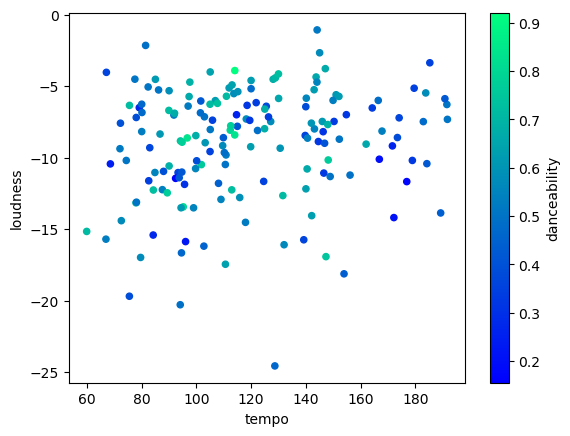

In [42]:
# Plot the DataFrame, code came from November 1st in-class assignment 01-Ins_OverTheMoon

df.plot.scatter(x="tempo",y="loudness", c="danceability",colormap="winter")
plt.show()

In [6]:
#3. Encode the categorical variables from the features data using get_dummies.

In [7]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [8]:
# Review the features data
X.head()

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,album_img_https://i.scdn.co/image/df6a48dc94245be056b35262606c7adfd1821b99,album_img_https://i.scdn.co/image/df9902b4e29a085db5b3fb511c1e2c78ffe60831,album_img_https://i.scdn.co/image/e06f3ddadf59ee24504fc02bfe205945807a2437,album_img_https://i.scdn.co/image/eac6c25a86aff46cd92fc024f656ec63d1f728dd,album_img_https://i.scdn.co/image/ee361ed71a3bd86d8f3ef89ac04085907a64a4ea,album_img_https://i.scdn.co/image/f13ce082cb050c8544fbae7c94a4ab66bdd004aa,album_img_https://i.scdn.co/image/f24789954ae8fba7649eb8433c7b676ba5254ccb,album_img_https://i.scdn.co/image/f391c733847c060f9bdde8f089ea4a3ca3653049,album_img_https://i.scdn.co/image/f9890a307f1aac00eca2d0c80ed1b1ff6226aa32,album_img_https://i.scdn.co/image/fa44b1710dc05f20b0af4706ec642ad65d6a48a7
0,1,0.195,0.348,-10.106,0.0332,0.820000,0.000000,0.1260,0.262,166.824,...,0,0,0,0,0,0,0,0,0,0
1,2,0.225,0.248,-15.871,0.0337,0.912000,0.000143,0.4040,0.190,96.013,...,0,0,0,0,0,0,0,0,0,0
2,3,0.444,0.288,-11.793,0.0326,0.911000,0.000007,0.0987,0.356,108.043,...,0,0,0,0,0,0,0,0,0,0
3,4,0.687,0.496,-4.708,0.0339,0.434000,0.001440,0.0613,0.746,97.575,...,0,0,0,0,0,0,0,0,0,0
4,5,0.477,0.841,-5.172,0.0358,0.000165,0.097100,0.2570,0.571,119.954,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#4. Separate the data into training and testing subsets.

In [10]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
###from October 30th class assignment 01-Stu_WorkThroughLogistics

In [30]:
 ### Create a logistic regression model
### from sklearn.linear_model import LogisticRegression
### classifier = LogisticRegression(solver='lbfgs', random_state=1)

### Define the logistic regression model
### log_classifier = LogisticRegression(solver="lbfgs",max_iter=20000)

### Train the model
### log_classifier.fit(X_train,y_train)

In [31]:
###from sklearn.metrics import accuracy_score
### y_pred = log_classifier.predict(X_test)
### print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [12]:
# 5. Scale the data using StandardScaler

In [13]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [14]:
#6. Instantiate an K Nearest Neighbor Classifier instance.

In [15]:
 # Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
 #7. Fit the model using the training data.

In [17]:
 # Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
#8. Make predictions using the testing data.

In [19]:
 # Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [20]:
# 9. Generate the classification report for the test data.

In [21]:
 # Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

                                                                                          precision    recall  f1-score   support

                                                              8 Days of Christmas - Live       0.00      0.00      0.00         0
                                                                     A Marshmallow World       0.00      0.00      0.00         0
                                                         All I Want for Christmas Is You       0.11      1.00      0.20         1
                                                                    Baby! It's Christmas       0.00      0.00      0.00         1
                        Baby, It's Cold Outside (Glee Cast Version) (feat. Darren Criss)       0.00      0.00      0.00         1
                                                                          Blue Christmas       0.00      0.00      0.00         0
                                                                           Bring Me Love 

C:\Users\wsabr\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wsabr\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wsabr\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wsabr\anaconda3\envs\dev\li